In [1]:
# Load the packages you intend to work with every time you start a new session
library(tseries)
library(TSA)
library(forecast)

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-12. For overview type 'help("mgcv-package")'.

Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness

This is forecast 7.1 


Attaching package: ‘forecast’

The following objects are masked from ‘package:TSA’:

    fitted.Arima, plot.Arima

The following object is masked from ‘package:nlme’:

    getResponse



In [5]:
milk <- read.csv("http://www.escet.urjc.es/biodiversos/R/milk.csv", header=T, sep=",")

In [6]:
str(milk)

'data.frame':	144 obs. of  3 variables:
 $ year : int  1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 ...
 $ month: Factor w/ 12 levels "April","August",..: 5 4 8 1 9 7 6 2 12 11 ...
 $ milk : int  1343 1236 1401 1396 1457 1388 1389 1369 1318 1354 ...


In [7]:
head(milk)

,year,month,milk
1,1994,January,1343
2,1994,February,1236
3,1994,March,1401
4,1994,April,1396
5,1994,May,1457
6,1994,June,1388


In [8]:
milk

,year,month,milk
1,1994,January,1343
2,1994,February,1236
3,1994,March,1401
4,1994,April,1396
5,1994,May,1457
6,1994,June,1388
7,1994,July,1389
8,1994,August,1369
9,1994,September,1318
10,1994,October,1354


In [11]:
milk.ts <- ts(data=milk$milk, start=c(1994, 1), end=c(2005,12), frequency = 12)

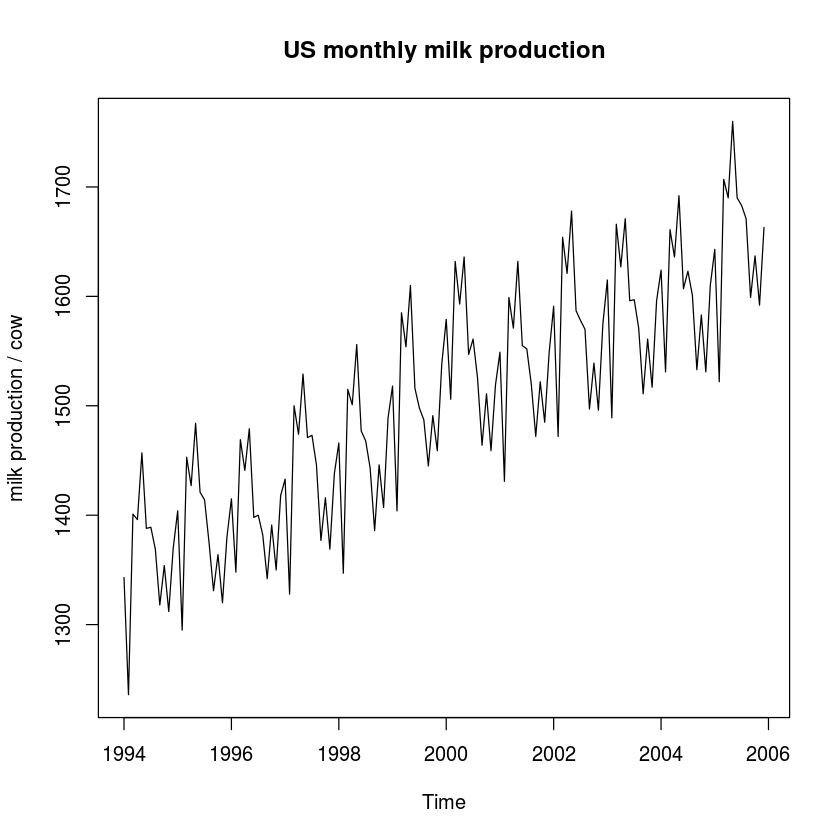

In [18]:
# has a trend and seasonality
plot(milk.ts, ylab = "milk production / cow", main="US monthly milk production")

In [14]:
alimilk <- HoltWinters(milk.ts)

In [23]:
# we use all the data for the trend (i.e. the trend is constant),
# but only half of the seasonality data
# and little of the white noise
alimilk

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = milk.ts)

Smoothing parameters:
 alpha: 0.8467204
 beta : 0
 gamma: 0.5552876

Coefficients:
           [,1]
a   1666.598837
b      2.141171
s1    21.089301
s2   -91.438172
s3    67.437048
s4    36.111285
s5    90.300812
s6    16.743017
s7    19.100623
s8    -3.367374
s9   -62.829218
s10  -19.659715
s11  -67.724830
s12   -3.981659

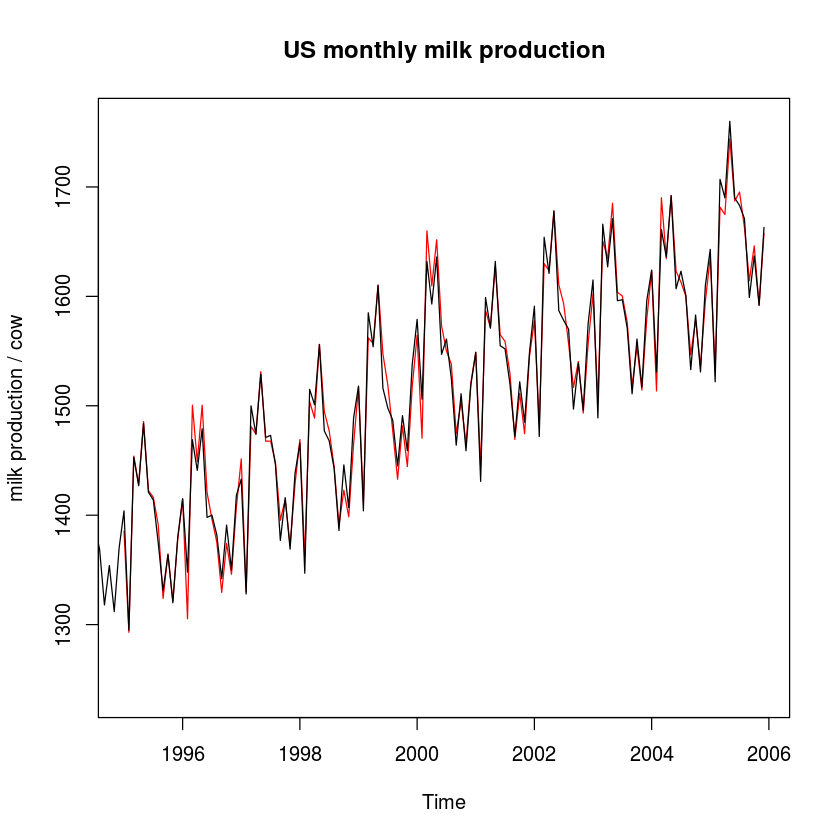

In [22]:
plot(alimilk, ylab = "milk production / cow", main="US monthly milk production")

In [20]:
# n.ahead=60: predict monthly for 5 yrs
pred.alimilk <- predict(alimilk, n.ahead = 60, prediction.interval = T)

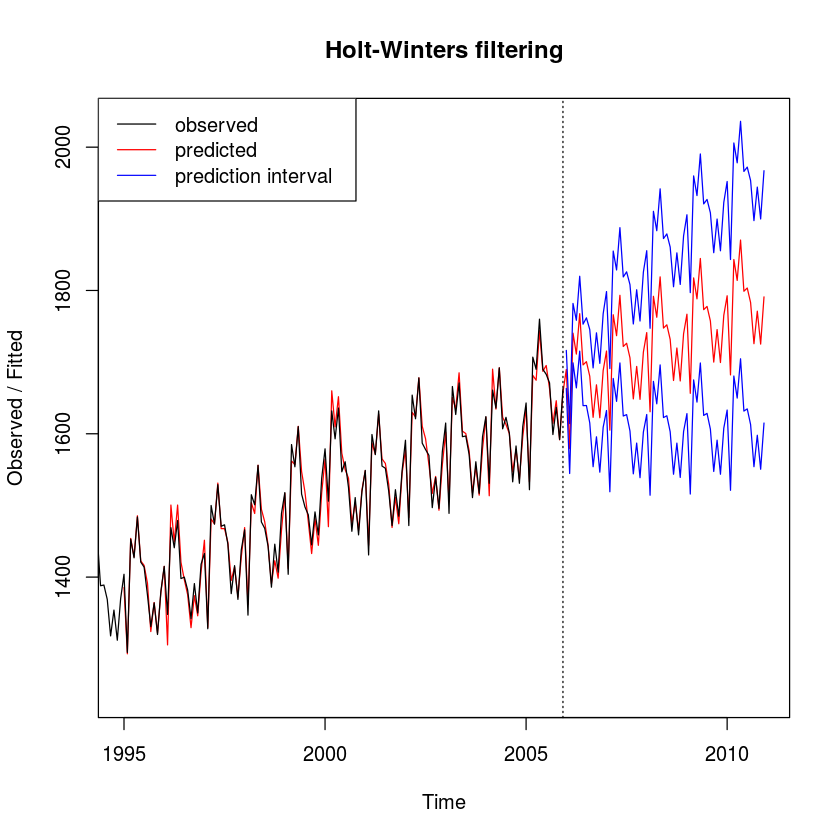

In [24]:
plot(alimilk, pred.alimilk)
labs = c("observed", "predicted", "prediction interval")
legend("topleft", lty=rep(1,3), legend=labs, col=c("black", "red", "blue"))